In [1]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

In [2]:
import os
os.getcwd()

'C:\\Users\\a\\git\\practical-statistics-for-data-scientists\\python\\notebooks'

In [3]:
os.chdir('C:/Users/a/git/practical-statistics-for-data-scientists')
os.getcwd()


'C:\\Users\\a\\git\\practical-statistics-for-data-scientists'

In [4]:
AIRLINE_STATS_CSV = 'DATA/airline_stats.csv'
KC_TAX_CSV = 'DATA/kc_tax.csv.gz'
LC_LOANS_CSV = 'DATA/lc_loans.csv'
AIRPORT_DELAYS_CSV = 'DATA/dfw_airline.csv'
SP500_DATA_CSV = 'DATA/sp500_data.csv.gz'
SP500_SECTORS_CSV = 'DATA/sp500_sectors.csv'
STATE_CSV = 'DATA/state.csv'

In [5]:
state=pd.read_csv(STATE_CSV)
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [6]:
state['Population'].mean()

6162876.3

In [7]:
trim_mean(state['Population'],0.1)

4783697.125

In [8]:
state['Population'].median()

4436369.5

In [9]:
np.average(state['Murder.Rate'],weights=state['Population'])

4.445833981123393

In [10]:
wquantiles.median(state['Murder.Rate'], weights=state['Population'])

4.4

In [11]:
state['Population'].var()

46898327373394.445

In [12]:
state['Population'].std()

6848235.347401142

In [13]:
state['Population'].quantile(0.75)-state['Population'].quantile(0.25)

4847308.0

In [14]:
robust.scale.mad(state['Population'])

3849876.1459979336

In [15]:
state['Murder.Rate'].quantile([0.05,0.25,0.5,0.75,0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Text(0, 0.5, 'Population (millions)')

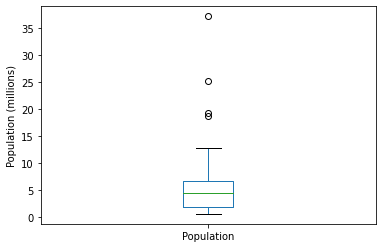

In [16]:
ax=(state['Population']/1000000).plot.box()
ax.set_ylabel('Population (millions)')

In [17]:
binnedPopulation=pd.cut(state['Population'],10)
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(33584923.0, 37253956.0]     1
(22577824.0, 26246857.0]     1
(18908791.0, 22577824.0]     1
(15239758.0, 18908791.0]     1
(29915890.0, 33584923.0]     0
(26246857.0, 29915890.0]     0
Name: Population, dtype: int64

Text(0.5, 0, 'Population( millions)')

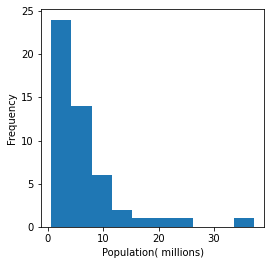

In [18]:
ax=(state['Population']/1_000_000).plot.hist(figsize=(4,4))
ax.set_xlabel('Population( millions)')

Text(0.5, 0, 'Murder Rate (per 100,000)')

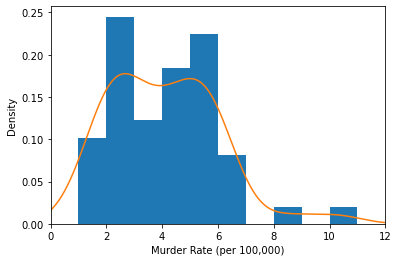

In [19]:
ax=state['Murder.Rate'].plot.hist(density=True,xlim=[0,12],bins=range(1,12))
ax=state['Murder.Rate'].plot.density()
ax.set_xlabel('Murder Rate (per 100,000)')

In [20]:
dfw=pd.read_csv(AIRPORT_DELAYS_CSV)

In [21]:
dfw.head()

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


Text(0, 0.5, 'Count')

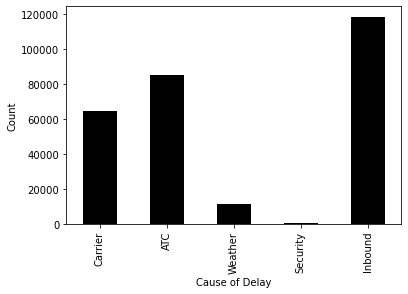

In [22]:
ax=dfw.transpose().plot.bar(legend=False, color='k')
ax.set_xlabel('Cause of Delay')
ax.set_ylabel('Count')

In [23]:
inf_m=pd.read_excel("C:/Users/a/Downloads/education and infant mortality.xlsx")

In [24]:
inf_m.corr()

,Average,Male,Female,Infant Mortality Rate (2011)
Average,1.000000,0.955643,0.979951,-0.536771
Male,0.955643,1.000000,0.882528,-0.504166
Female,0.979951,0.882528,1.000000,-0.537379
Infant Mortality Rate (2011),-0.536771,-0.504166,-0.537379,1.000000


In [25]:
sp500_sym=pd.read_csv(SP500_SECTORS_CSV)
sp500_px=pd.read_csv(SP500_DATA_CSV, index_col=0)

In [26]:
sp500_sym.head()

,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS
1,information_technology,Technology,systems_software,CA
2,information_technology,Technology,systems_software,MSFT
3,information_technology,Technology,systems_software,RHT
4,information_technology,Technology,it_consulting_&_services,CTSH


In [27]:
TelecomSym=sp500_sym.loc[sp500_sym['sector']=='telecommunications_services']['symbol']

In [28]:
telecom=sp500_px.loc[sp500_px.index>='2012-07-01',TelecomSym]

In [29]:
sp500_px.head()

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,-0.007105,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,0.063893,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,-0.014192,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,-0.007105,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,-0.007096,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


In [30]:
telecom.corr()

,T,CTL,FTR,VZ,LVLT
T,1.000000,0.474683,0.327767,0.677612,0.278626
CTL,0.474683,1.000000,0.419757,0.416604,0.286665
FTR,0.327767,0.419757,1.000000,0.287386,0.260068
VZ,0.677612,0.416604,0.287386,1.000000,0.242199
LVLT,0.278626,0.286665,0.260068,0.242199,1.000000


<AxesSubplot:>

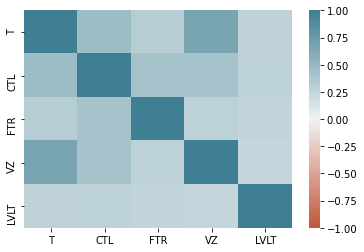

In [31]:
sns.heatmap(telecom.corr(),vmin=-1,vmax=1,cmap=sns.diverging_palette(20,220,as_cmap=True))

<AxesSubplot:>

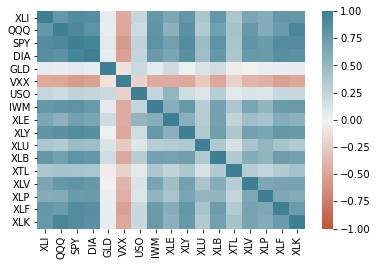

In [32]:
etfs=sp500_px.loc[sp500_px.index>'2012-07-01',sp500_sym[sp500_sym['sector']=='etf']['symbol']]
sns.heatmap(etfs.corr(),vmin=-1,vmax=1,cmap=sns.diverging_palette(20,220,as_cmap=True))

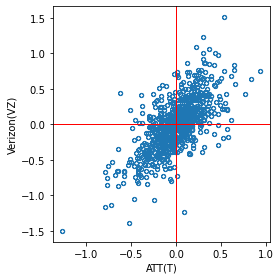

In [33]:
ax=telecom.plot.scatter(x='T',y='VZ',figsize=(4,4),marker='$\u25EF$')
ax.set_xlabel ('ATT(T)')
ax.set_ylabel('Verizon(VZ)')
ax.axhline(0,color='r', lw=1)
ax.axvline(0,color='r', lw=1)
plt.tight_layout()

In [34]:
kc_tax=pd.read_csv(KC_TAX_CSV)

In [35]:
kc_tax0=kc_tax.loc[(kc_tax.TaxAssessedValue<750000)&(kc_tax.SqFtTotLiving>100)&(kc_tax.SqFtTotLiving<3500),:]
kc_tax0.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
5,223000.0,1570,98032.0


# Hexagonal binning and Contours

Text(0, 0.5, 'Tax-Assessed Value')

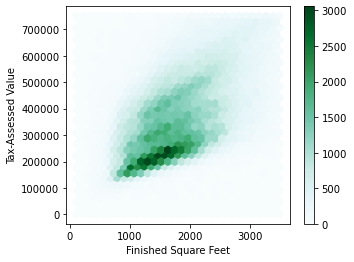

In [36]:
ax=kc_tax0.plot.hexbin(x='SqFtTotLiving',y='TaxAssessedValue',gridsize=30,sharex=False,figsize=(5,4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax-Assessed Value')

fig, ax = plt.subplots(figsize=(4, 4))
sns.kdeplot(data=kc_tax0, x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(4, 4))
ax = sns.kdeplot(data=kc_tax0, x='SqFtTotLiving',y= 'TaxAssessedValue', ax=ax)

In [37]:
lc_loans=pd.read_csv(LC_LOANS_CSV)

In [41]:
crosstab=lc_loans.pivot_table(index='grade',columns='status',aggfunc=lambda x:len(x),margins=True)
crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


In [56]:
df=crosstab.loc['A':'G',:].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, A to G
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Charged Off  7 non-null      int64
 1   Current      7 non-null      int64
 2   Fully Paid   7 non-null      int64
 3   Late         7 non-null      int64
 4   All          7 non-null      int64
dtypes: int64(5)
memory usage: 336.0+ bytes


In [57]:
df.loc[:,'Charged Off':'Late']=df.loc[:,'Charged Off':'Late'].div(df['All'],axis=0)
df['All'] = df['All'] / sum(df['All'])
perc_crosstab = df
perc_crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


Text(0.5, 0.98, '')

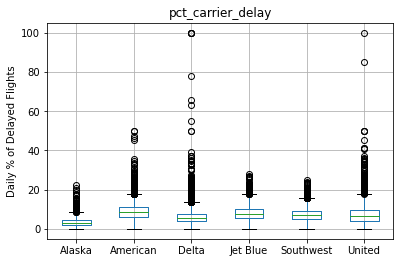

In [65]:
airline_stats=pd.read_csv(AIRLINE_STATS_CSV)
ax=airline_stats.boxplot(by='airline',column='pct_carrier_delay')
ax.set_ylabel('Daily % of Delayed Flights')
ax.set_xlabel('')
plt.suptitle('')

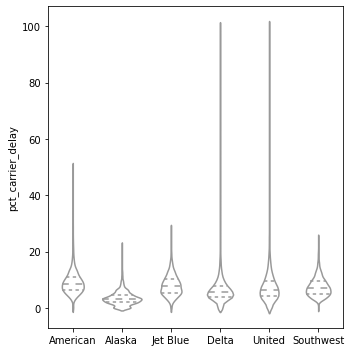

In [77]:
fig, ax=plt.subplots(figsize=(5,5))
sns.violinplot(data=airline_stats,x='airline', y='pct_carrier_delay',ax=ax, inner='quartile',color='white')

ax.set_xlabel('')
plt.tight_layout()
plt.show()

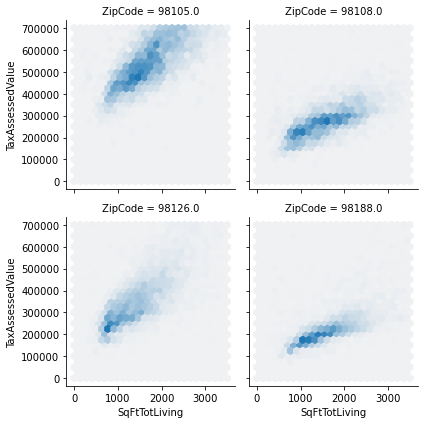

In [85]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip=kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)
g=sns.FacetGrid(kc_tax_zip,col='ZipCode',col_wrap=2)

g.set_axis_labels('Finished Square Feet', 'Tax-Assessed Value')
g.set_titles('Zip code {col_name:.0f}')
g.map(hexbin,'SqFtTotLiving', 'TaxAssessedValue',extent=[0, 3500, 0, 700000])